In [29]:
# !pip install langchain
# !pip install pydantic
# !pip install instructor
# !pip install openai
# !pip install ipywidgets
# !pip install chromadb
# !pip install pypdf
# !pip install tiktoken
# !pip install ipywidgets
# !pip install matplotlib
# !pip install graphviz

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)


# Chat Over docs

In [40]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
%%capture cell_1

"./assets-resources/docs/NIPS-2012-imagenet-classification-with-deep-convolutional-neural-networks-Paper.pdf"

In [42]:
cell_1.outputs[0].data["text/plain"].strip("'")

'./assets-resources/docs/NIPS-2012-imagenet-classification-with-deep-convolutional-neural-networks-Paper.pdf'

In [43]:
# source for this code mostly from: https://towardsdatascience.com/run-interactive-sessions-with-chatgpt-in-jupyter-notebook-87e00f2ee461
from langchain.chains import ConversationalRetrievalChain
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import PyPDFLoader
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from datetime import datetime
from IPython.display import HTML, display
from ipywidgets import widgets


def text_eventhandler(*args):
    # Needed bc when we "reset" the text input
    # it fires instantly another event since
    # we "changed" it's value to ""
    if args[0]["new"] == "":
        return

    # Show loading animation
    loading_bar.layout.display = "block"

    # Get question
    question = args[0]["new"]

    # Reset text field
    args[0]["owner"].value = ""

    # Formatting question for output
    q = (
        f'<div class="chat-message-right pb-4"><div>'
        + f'<img src="assets-resources/bear.png" class="rounded-circle mr-1" width="40" height="40">'
        + f'<div class="text-muted small text-nowrap mt-2">{datetime.now().strftime("%H:%M:%S")}</div></div>'
        + '<div class="flex-shrink-1 bg-light rounded py-2 px-3 ml-3">'
        + f'<div class="font-weight-bold mb-1">You</div>{question}</div>'
    )

    # Display formatted question
    output.append_display_data(HTML(q))

    try:
        response = qa({"question": f"{question}", "chat_history": chat_history})
        answer = response["answer"]
        chat_history.append((question, answer))
    except Exception as e:
        answer = "<b>Error:</b> " + str(e)

    # Formatting answer for output
    # Replacing all $ otherwise matjax would format them in a strange way
    answer_formatted = answer.replace('$', r'\$')
    a = (
        f'<div class="chat-message-left pb-4"><div>'
        + f'<img src="assets-resources/cat.png" class="rounded-circle mr-1" width="40" height="40">'
        + f'<div class="text-muted small text-nowrap mt-2">{datetime.now().strftime("%H:%M:%S")}</div></div>'
        + '<div class="flex-shrink-1 bg-light rounded py-2 px-3 ml-3">'
        + f'<div class="font-weight-bold mb-1">LLM</div>{answer_formatted}</div>'
    )

    # Turn off loading animation
    loading_bar.layout.display = "none"

    output.append_display_data(HTML(a))


loader = PyPDFLoader(cell_1.outputs[0].data["text/plain"].strip("'"))
txt_docs = loader.load_and_split()

embeddings = OpenAIEmbeddings()
txt_docsearch = Chroma.from_documents(txt_docs, embeddings)

llm = ChatOpenAI(model_name="gpt-3.5-turbo-16k", temperature=0.0)

chat_history = []
qa = ConversationalRetrievalChain.from_llm(llm, retriever=txt_docsearch.as_retriever())
chat_history = []

in_text = widgets.Text()
in_text.continuous_update = False
in_text.observe(text_eventhandler, "value")
output = widgets.Output()

file = open("./assets-resources/loading.gif", "rb")
image = file.read()
# give a title to the chatbot
title = widgets.HTML(
    value="Q&A with ImageNet Paper",
)
loading_bar = widgets.Image(
    value=image, format="gif", width="20", height="20", layout={"display": "None"}
)

In [44]:
display(
    widgets.HBox(
        [output],
        layout=widgets.Layout(
            width="100%",
            max_height="500px",
            display="inline-flex",
            flex_flow="column-reverse",
        ),
    )
)

display(
    widgets.Box(
        children=[title, loading_bar, in_text],
        layout=widgets.Layout(display="flex", flex_flow="row"),
    )
)

Box(children=(HTML(value='Q&A with ImageNet Paper'), Image(value=b'GIF89a\xc8\x00\xc8\x00\xf7\x00\x00;Ch\x83\x…

# Showing Examples

In [45]:
from examples import *

display_examples("Convolutional neural network")

Examples for concept:  Convolutional neural network
Image classification: A convolutional neural network can be used to classify images into different categories, such as identifying whether an image contains a cat or a dog.
Object detection: CNNs can be used to detect and locate objects in an image, such as identifying the location of cars in a traffic scene.
Facial recognition: CNNs can be trained to recognize and distinguish different faces in images or video footage.
Medical image analysis: CNNs can be used to analyze medical images, such as identifying tumors or anomalies in X-ray or MRI scans.
Natural language processing: CNNs can be applied to analyze and process text data, such as sentiment analysis or text classification tasks.
Art generation: CNNs can be used to generate new art pieces, such as generating realistic images from abstract inputs.
Autonomous driving: CNNs can be used in self-driving cars to analyze and interpret sensor data, such as identifying pedestrians, traff

# Quiz Me

In [48]:
from examples import *
from quiz_me import *


example = "Implementation of a convolutional neural network in Pytorch for object detection"
quiz_me(example, 3)

# Extracting Information

In [49]:
from info_extraction import *

prompt = """
Answer: A convolutional neural network (CNN) is a deep learning algorithm that can automatically learn and extract features from input images.

Answer: CNN is commonly used for object detection because it can capture spatial dependencies across the image and detect objects with high accuracy.

Answer: Object detection using a CNN involves feeding an input image into the network, which then convolves the image with several filters to extract features. The network then classifies and localizes objects in the image based on these extracted features.

"""
display_info(prompt)

Fact: convolutional neural network (CNN)
Definition: A convolutional neural network (CNN) is a type of deep learning algorithm that is particularly effective for image recognition and processing. It is inspired by the organization of the animal visual cortex, in which neurons in different layers respond to different aspects of the visual field. CNNs are designed to automatically and adaptively learn spatial hierarchies of features from input images.
*
Fact: deep learning algorithm
Definition: Deep learning algorithms are a subset of machine learning algorithms that are inspired by the structure and function of the brain, specifically the neural networks that form the basis of the brain's ability to process and analyze complex information. These algorithms are typically used for tasks that require large-scale data analysis and pattern recognition, such as image and speech recognition, natural language processing, and autonomous driving.
*
Fact: learn and extract features
Definition: Lea

# Anki Flashcards

In [55]:
from flashcards import *

basic_card = """
A convolutional neural network (CNN) is a type of deep learning algorithm that is particularly effective for image recognition and processing. It is inspired by the organization of the animal visual cortex, in which neurons in different layers respond to different aspects of the visual field. CNNs are designed to automatically and adaptively learn spatial hierarchies of features from input images.
"""
response = create_flashcard(basic_card)
print(f"Number of clozed deletions: {response.num_of_clozed_deletions}")
print(response.text_with_cloze_deletions)

Number of clozed deletions: 6
A {c1::convolutional neural network (CNN)} is a type of {c1::deep learning algorithm} that is particularly effective for {c1::image recognition} and {c1::processing}. It is inspired by the organization of the animal visual cortex, in which neurons in different layers respond to different aspects of the visual field. {c1::CNNs} are designed to automatically and adaptively learn {c1::spatial hierarchies of features} from input images.


# Q&A with Validated Citations

In [27]:
# source: instructor docs!
from citation_validation import *

question = "What did the author grew up?"
context = """
My name is Lucas soares, and I grew up in Sao Paulo Brazil but I moved to Portugal 6 years ago.
I went to a science high school but in university I studied Artificial Intelligence.
I worked in a research lab called Champalimaud Institute working on AI applications to Neuroscience.
I also love training jiu jitsu for which I earned a black belt last year after 10 years of training.
"""

query_validate(question, context)

# Knowledge Graphs

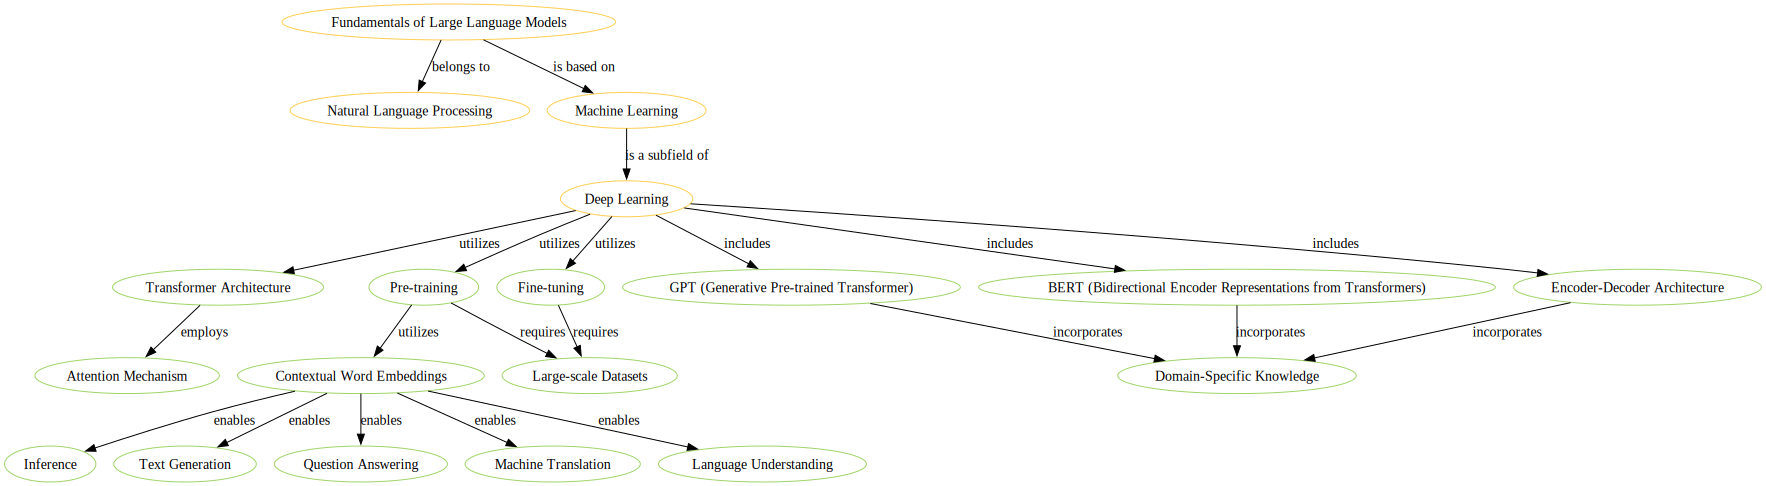

Knowledge graph generated and visualized.


In [30]:
# source: pydantic presentation by Jason Liu
from visualize_knowledge_graph import knowledge_graph_primitive

knowledge_graph_primitive("the Fundamentals of Large Language Models")